In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
#!pip install setuptools==58

In [55]:
#!pip install regressors

In [4]:
#!pip install -r requirements.txt

## Dataset

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
header=None,
sep='\s+'
)

df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

## Variable dictionary:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Conociendo el Dataset

In [7]:
df.shape

(506, 14)

In [8]:
#Datos nulos
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
#Tipo de datos
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

<AxesSubplot: >

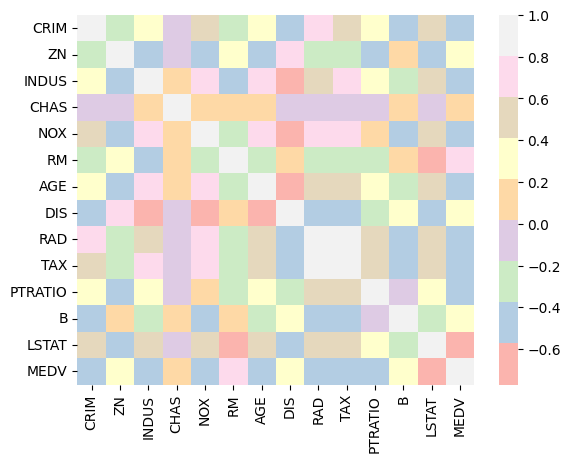

In [10]:
#correlacion entre variables
sns.heatmap(df.corr(),cmap='Pastel1',annot=False,cbar=True)

### Heatmap

##### Las variables que utilizaré para predecir el MEDV en un primer modelo serán las que tengan una correlación mayor o igual a 4 o menor o igual a -4.

##### elegí esta paleta de colores ya que me permitía ver mejor qué variables estaban relacionadas entre si.

In [11]:
#valores unicos por variable
my_dict  = {}

for i in list(df.columns):
    my_dict[i] = df[i].value_counts().shape[0]


pd.DataFrame(my_dict,index=['unique']).transpose()

,unique
CRIM,504
ZN,26
INDUS,76
CHAS,2
NOX,81
RM,446
AGE,356
DIS,412
RAD,9
TAX,66


In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
cols_to_use = ['RM','LSTAT','ZN','INDUS','CRIM','TAX','PTRATIO','AGE']
col_to_predict = ['MEDV']

## Distribuciones de variables de interes

<AxesSubplot: xlabel='INDUS', ylabel='Count'>

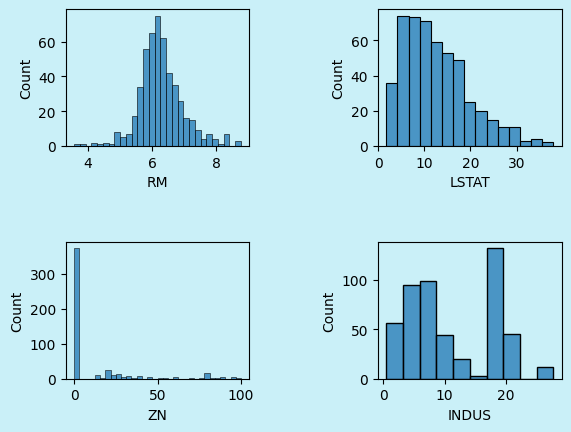

In [15]:
fig = plt.figure()
gs = fig.add_gridspec(2,2)
gs.update(wspace = 0.7, hspace = 0.7)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#colors
bgcolor = '#caf0f8'
fig.patch.set_facecolor(bgcolor)
ax0.set_facecolor(bgcolor)
ax1.set_facecolor(bgcolor)
ax2.set_facecolor(bgcolor)
ax3.set_facecolor(bgcolor)

#ax0
sns.histplot(ax=ax0,data=df,x='RM')

#ax1
sns.histplot(ax=ax1,data=df,x='LSTAT')
#ax2
sns.histplot(ax=ax2,data=df,x='ZN')
#ax3
sns.histplot(ax=ax3,data=df,x='INDUS')

<AxesSubplot: xlabel='AGE', ylabel='Count'>

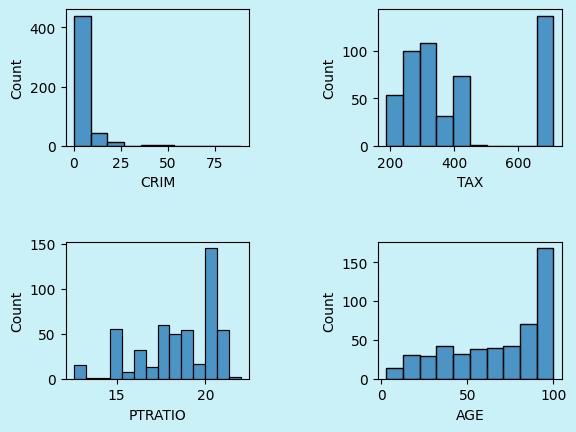

In [16]:
fig = plt.figure()
gs = fig.add_gridspec(2,2)
gs.update(wspace = 0.7, hspace = 0.7)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])


#colors 
bgcolor = '#caf0f8'
fig.patch.set_facecolor(bgcolor)
ax0.set_facecolor(bgcolor)
ax1.set_facecolor(bgcolor)
ax2.set_facecolor(bgcolor)
ax3.set_facecolor(bgcolor)
#ax0
sns.histplot(ax=ax0,data=df,x='CRIM',bins=10)

#ax1
sns.histplot(ax=ax1,data=df,x='TAX')
#ax2
sns.histplot(ax=ax2,data=df,x='PTRATIO')
#ax3
sns.histplot(ax=ax3,data=df,x='AGE')

Text(0.5, 1.0, 'Distribucion MEDV')

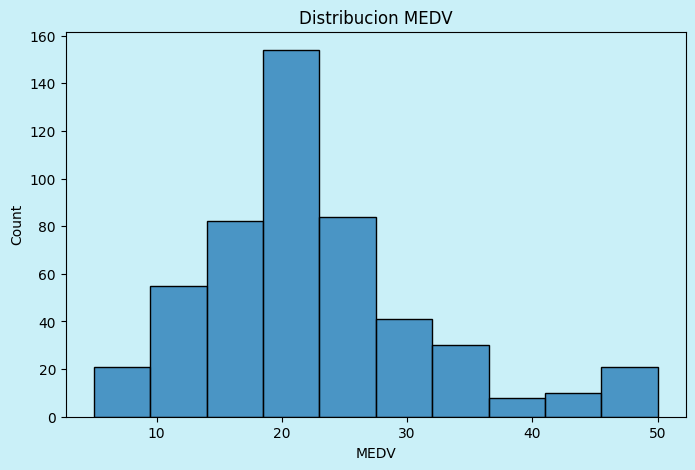

In [17]:
fig = plt.figure(figsize=(8,5))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
sns.histplot(ax=ax,data =df,x='MEDV',bins=10)

bgcolor = '#caf0f8'
fig.patch.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
plt.title('Distribucion MEDV')

# Modelo de regresión lineal

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Primer modelo

In [19]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [20]:

#features que nos ayudarán a predecir
x_cols = cols_to_use
y_col = col_to_predict

#solo valores en x and y
x = df[x_cols].values
y = df[y_col].values


#creamos datos de entrenamiento y de testeo para las dos variables
x_train,x_test,y_train,y_test = train_test_split(x,y)


#estandarizamos los datos
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

#estandarizamos los datos de teste y entrenamiento
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

#creamos y entrenamos modelo
model = LinearRegression()
model.fit(x_train,y_train)

   


LinearRegression()

In [21]:
#predecimos con los valores de testeo
y_pred = model.predict(x_test)
y_pred.shape

(127, 1)

In [22]:
print(f'xtrain shape: {x_train.shape} x_test shape: {x_test.shape}',
f'ytrain shape: {y_train.shape} y_test shape: {y_test.shape}', sep='\n')

xtrain shape: (379, 8) x_test shape: (127, 8)
ytrain shape: (379, 1) y_test shape: (127, 1)


### Metricas para primer modelo

In [23]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print('mse:',mse.round(3),'r2:',r2.round(3),sep='\n')

mse:
0.358
r2:
0.669


In [24]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [25]:
y_test = y_test.reshape(-1) 

stats.summary(model,x_test,y_test,x_cols)

Residuals:
    Min      1Q  Median     3Q    Max
-3.0738 -0.2616  0.0519 0.3331 0.9012


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept -0.008846    0.053434  -0.1656  0.868775
RM          0.336130    0.067191   5.0026  0.000002
LSTAT      -0.429143    0.085897  -4.9960  0.000002
ZN         -0.009249    0.063067  -0.1467  0.883639
INDUS       0.034386    0.083318   0.4127  0.680518
CRIM       -0.038414    0.067485  -0.5692  0.570215
TAX        -0.054162    0.081712  -0.6628  0.508647
PTRATIO    -0.221717    0.060274  -3.6785  0.000346
AGE         0.015153    0.074101   0.2045  0.838301
---
R-squared:  0.66855,    Adjusted R-squared:  0.64608
F-statistic: 29.75 on 8 features


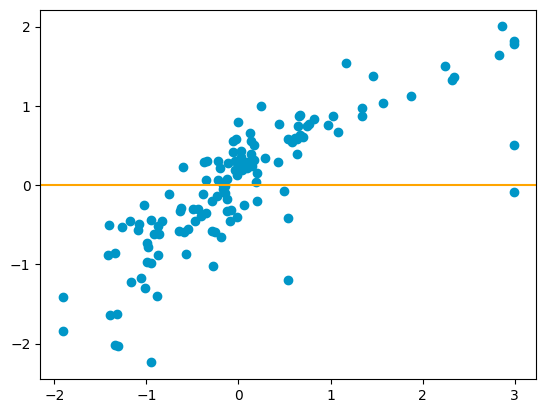

In [26]:
rl = np.subtract(y_test,y_pred)
plt.scatter(y_test,y_pred,color='#0096c7')
plt.axhline(y=0,color='orange')

## Segundo modelo quitando variables Pvalues

In [27]:
new_cols = ['RM','LSTAT','PTRATIO']

In [28]:
#nuevos features para la predicción
x_cols = new_cols
y_col = col_to_predict

#valores en x and y
x = df[x_cols].values
y = df[y_col].values


#creamos datos de entrenamiento y de testeo para las dos variables
x_train,x_test,y_train,y_test = train_test_split(x,y)


#estandarizamos los datos
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

#estandarizamos los valores de entrenamiento y testeo
x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

#creamos modelo
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [29]:
print(f'xtrain shape: {x_train.shape} x_test shape: {x_test.shape}',
f'ytrain shape: {y_train.shape} y_test shape: {y_test.shape}', sep='\n')

xtrain shape: (379, 3) x_test shape: (127, 3)
ytrain shape: (379, 1) y_test shape: (127, 1)


In [30]:
y_pred = model.predict(x_test)
y_pred.shape

(127, 1)

### Metricas segundo modelo

In [31]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print('mse:',mse.round(3),'r2:',r2.round(3),sep='\n')

mse:
0.441
r2:
0.562


In [32]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [33]:
y_test = y_test.reshape(-1) 

stats.summary(model,x_test,y_test,x_cols)

Residuals:
    Min      1Q  Median     3Q    Max
-3.1907 -0.2129  0.0836 0.3613 1.0333


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept -0.012203    0.059353  -0.2056  0.837428
RM          0.378036    0.071787   5.2660  0.000001
LSTAT      -0.419391    0.071623  -5.8556  0.000000
PTRATIO    -0.235814    0.067373  -3.5001  0.000644
---
R-squared:  0.56224,    Adjusted R-squared:  0.55156
F-statistic: 52.66 on 3 features


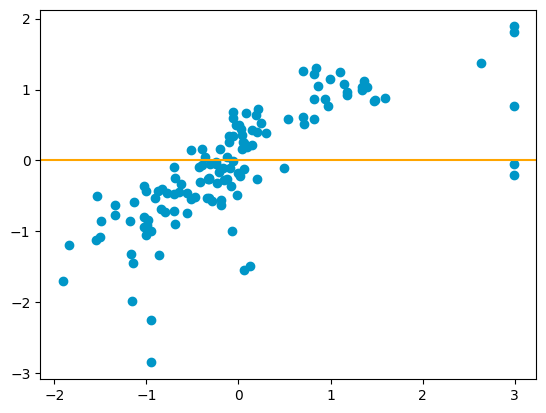

In [34]:
rl = np.subtract(y_test,y_pred)
plt.scatter(y_test,y_pred,color='#0096c7')
plt.axhline(y=0,color='orange')

## Tercer modelo 

In [35]:
df_plus = df.copy()
df_plus['over_tax'] = (df_plus.TAX >= 500).astype(int)
df_plus['rm_over_tax'] = df_plus.RM * df_plus.over_tax


In [36]:
df_plus

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,over_tax,rm_over_tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0,0.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0,0.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0,0.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0,0.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0,0.0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0,0.0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0,0.0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0,0.0


<AxesSubplot: >

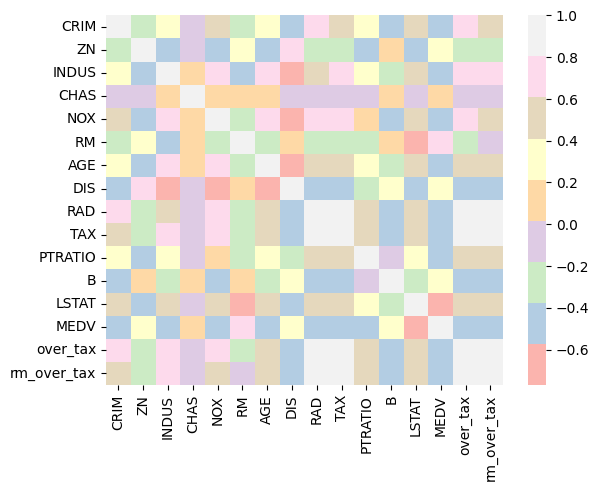

In [37]:
sns.heatmap(data=df_plus.corr(),cmap='Pastel1')

## observaciones heatmap con nuevas columnas

##### podemos ver que hay una gran correlacion entre las tasas mayores de 500 dolares y la variable INDUS (proporción de fabricas cercanas).

In [38]:
df_plus

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,over_tax,rm_over_tax
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0,0.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0,0.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0,0.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0,0.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,0,0.0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,0,0.0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,0,0.0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,0,0.0


### Columnas utilizadas

In [39]:
new_cols = ['RM','LSTAT','PTRATIO','rm_over_tax','over_tax']

In [40]:
#nuevos features 
x_cols = new_cols
y_col = col_to_predict

x = df_plus[x_cols].values
y = df_plus[y_col].values


#creamos datos de entrenamiento y de testeo para las dos variables
x_train,x_test,y_train,y_test = train_test_split(x,y)


#estandarizamos los datos
sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)

y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

#creamos modelo
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [41]:
print(f'xtrain shape: {x_train.shape} x_test shape: {x_test.shape}',
f'ytrain shape: {y_train.shape} y_test shape: {y_test.shape}', sep='\n')

xtrain shape: (379, 5) x_test shape: (127, 5)
ytrain shape: (379, 1) y_test shape: (127, 1)


In [42]:
y_pred = model.predict(x_test)
y_pred.shape

(127, 1)

### Metricas tercer modelo

In [43]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)
print('mse:',mse.round(3),'r2:',r2.round(3),sep='\n')

mse:
0.258
r2:
0.727


In [44]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [45]:
y_test = y_test.reshape(-1) 

stats.summary(model,x_test,y_test,x_cols)

Residuals:
    Min      1Q  Median    3Q    Max
-2.8284 -0.2035  0.1141 0.314 1.2882


Coefficients:
             Estimate  Std. Error  t value   p value
_intercept   0.008462    0.045301   0.1868  0.852118
RM           0.555508    0.061649   9.0109  0.000000
LSTAT       -0.422751    0.064757  -6.5283  0.000000
PTRATIO     -0.171244    0.054315  -3.1528  0.002022
rm_over_tax -2.401700    0.363813  -6.6015  0.000000
over_tax     2.409427    0.366505   6.5741  0.000000
---
R-squared:  0.72701,    Adjusted R-squared:  0.71573
F-statistic: 64.45 on 5 features


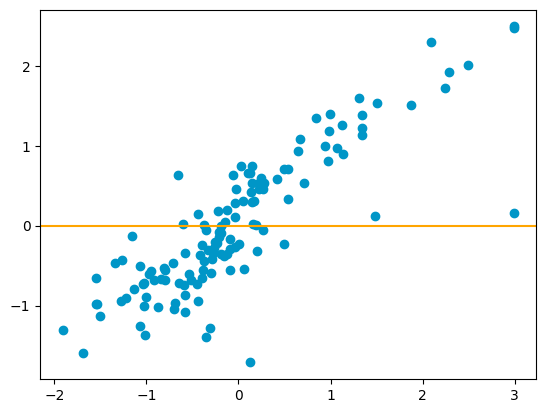

In [46]:
rl = np.subtract(y_test,y_pred)
plt.scatter(y_test,y_pred,color='#0096c7')
plt.axhline(y=0,color='orange')

## Observaciones

- El tercer modelo tiene un MSE más bajo y un r2 más cercano a 1

- añadiendo una variable con tax mayores a 500 nos ayudó a que el modelo hiciera mejores predicciones 

# Otros modelos

## variable LSTAT

### Primera forma

In [47]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
numeros_train = int(df.shape[0] * 0.75)
datos_train = df.iloc[:numeros_train,:]
datos_test = df.iloc[numeros_train:, :]

In [48]:
datos_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [49]:
model_tt = linear_model.LinearRegression()
model_tt.fit(pd.DataFrame(datos_train.iloc[:, 12]), datos_train.iloc[:, 13])
# coef.
print("Coef", model_tt.coef_)
# intercept.
print("\nBias", model_tt.intercept_)


Coef [-0.93869578]

Bias 35.00323182868466


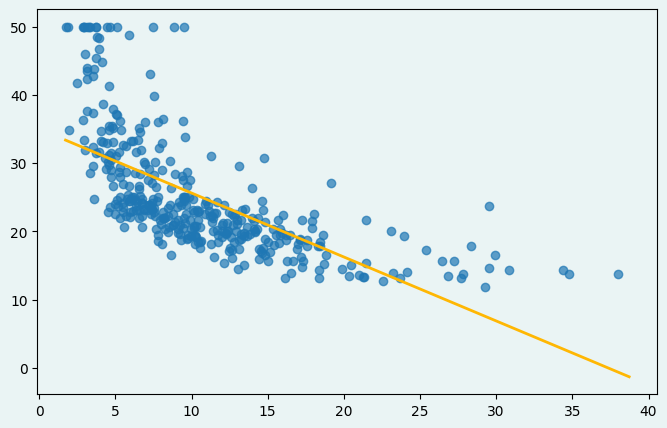

In [50]:
valores_en_x = np.arange(datos_train['LSTAT'].min(),datos_train['LSTAT'].max()+1,0.5)
valores_en_y = -0.938*valores_en_x + 35.003

#creación de figura
fig = plt.figure(figsize=(8,5))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])
ax.scatter(datos_train['LSTAT'],datos_train['MEDV'],alpha=0.7)
ax.plot(valores_en_x,valores_en_y,color='#ffb703',linewidth=2)

#color
bgcolor = '#eaf4f4'
fig.patch.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)

In [51]:
# Predicción con model_1 = linear_model.LinearRegression() utilizando los datos de prueba.
ypredict = model_tt.predict(pd.DataFrame(datos_test.iloc[:, 12]))

# Calculamos el MSE con los valores predichos en y.
print('MSE: %.2f'
      % mean_squared_error(pd.DataFrame(datos_test.iloc[:, 13]), ypredict))

# Calculamos R^2 con los valores predichos en y.
print('R2: %.2f'
      % r2_score(pd.DataFrame(datos_test.iloc[:,13]), ypredict))

MSE: 23.79
R2: 0.18


### Segunda forma

In [52]:
x = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)


standardcaler_x = StandardScaler()
standardcaler_y = StandardScaler()

x_std = standardcaler_x.fit_transform(x)
y_std = standardcaler_y.fit_transform(y)

s_lr = LinearRegression()
s_lr.fit(x_std,y_std)

LinearRegression()

Text(0.5, 0, 'lower status "LSTAT"')

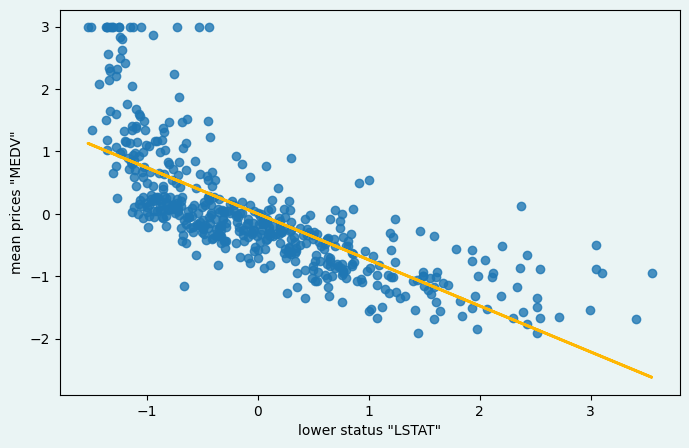

In [ ]:
fig = plt.figure(figsize=(8,5))
gs = fig.add_gridspec(1,1)
ax = fig.add_subplot(gs[0,0])

ax.scatter(x_std,y_std,alpha=0.8)
ax.plot(x_std,s_lr.predict(x_std),color='#ffb703',linewidth=2)

bgcolor = '#eaf4f4'
fig.patch.set_facecolor(bgcolor)
ax.set_facecolor(bgcolor)
plt.ylabel('mean prices "MEDV"')
plt.xlabel('lower status "LSTAT"')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ab9de7b5-4992-4d12-9e36-e4f4e874d015' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>